##### QRF_1 is trained with a dataset that contains non-time series variables, such as residual_energy_usage and pump_storage furthermore the year is not included.

In [1]:
# Path setup
import sys
import os

sys.path.append("/home/dchen/Random_Forest_Weights/")

# Basics:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful:
from sklearn.model_selection import train_test_split

# Pipeline and ColumnsTransformer:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# models:
import statsmodels.api as sm

# my functions:
from src_rf.methods.calc_mean import *
from src_rf.methods.calc_weights import *
from src_rf.methods.calc_dist import *
from src_rf.datasets.load_weights_energy import * 
from src_rf.methods.filter_weights_rf import * 

### 0. Set up

In [2]:
dir_path = "/Data/Delong_BA_Data/rf_weights/"

### 1. Load Data and train test split

In [3]:
df = pd.read_csv("/home/dchen/Random_Forest_Weights/src_rf/data/energy_data_hourly.csv"
                 , index_col = 'datetime', parse_dates=True)

In [4]:
X = df.drop('total_energy_usage', axis = 1)
y = df['total_energy_usage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 ,shuffle=False, random_state=42)

### 2. Load Random Forest Weights

In [5]:
rf_weights = load_weights_energy(dir_path)

### 3. Weight Exploration

#### 3.1 Test date to look at

In [7]:
test_date = 20450
print(X_test.iloc[test_date,2:])

hour         18.0
month        10.0
Friday        0.0
Monday        0.0
Saturday      0.0
Sunday        0.0
Thursday      0.0
Tuesday       1.0
Wednesday     0.0
Name: 2022-10-11 18:00:00, dtype: float64


#### 3.2 Load weights

In [24]:
rf_weight_0 = filter_weight_rf(rf_weights , test_date)
rf_weight_0.sum()

1.0

#### 3.3 Non-Zero Values

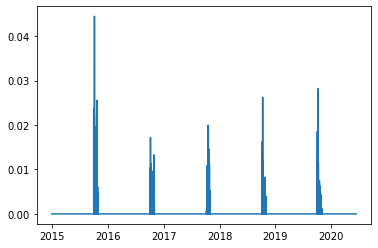

In [47]:
plt.plot(X_train.index, rf_weight_0, )
plt.show()

In [27]:
non_zeros =  np.where(rf_weight_0 != 0)[0]

In [55]:
print('Year:')
print(X_train.iloc[non_zeros, : ].index.year.value_counts().sort_values(ascending = False))
print(100 * '-')

print('Month:')
print(X_train.iloc[non_zeros, : ]['month'].value_counts().sort_values(ascending = False))
print(100 * '-')

print('Week day:')
print(X_train.iloc[non_zeros, :][['Friday','Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
      .sum().sort_values(ascending = False))
print(100 * '-')

print('Hour:')
print(X_train.iloc[non_zeros, :]['hour'].value_counts().sort_values(ascending = False))

Year:
2015    55
2016    52
2019    52
2018    43
2017    41
Name: datetime, dtype: int64
----------------------------------------------------------------------------------------------------
Month:
10    243
Name: month, dtype: int64
----------------------------------------------------------------------------------------------------
Week day:
Tuesday      80
Thursday     48
Wednesday    43
Monday       40
Friday       32
Saturday      0
Sunday        0
dtype: int64
----------------------------------------------------------------------------------------------------
Hour:
18    76
19    58
17    40
20    24
16    23
15    18
14     4
Name: hour, dtype: int64
